In [1]:
from VAE import *
from PokeData import *
from TrainerVae import *
import shutil


if(os.path.exists('runs')):
    shutil.rmtree('runs')
tarsize = (56,56)
lat = 10

model = VAE(tarsize,lat,20.)

data = torch.utils.data.Subset(PokeData('pokgen2',tarsize=tarsize),indices=range(100))
print(f'actually, {len(data)} things')


trainer = TrainerVae(model,data,model_save_loc='state',state_save_loc='state',device='cpu',run_name='Testing')

print(model.paranum)


Out of convo chans : torch.Size([2, 256, 4, 4])
Out of convo chans : torch.Size([2, 256, 4, 4])
Loaded 200 images
actually, 100 things
915768


In [3]:
trainer.change_lr(1e-3)
trainer.train_epochs(5000,save_every=10,batch_log=1,batch_size=10)

Number of batches/epoch :  10


  0%|          | 0/5000 [00:00<?, ?it/s]c:\Users\vassi\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\optim\lr_scheduler.py:163: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
  0%|          | 1/5000 [00:00<49:37,  1.68it/s]

Saved training state


  0%|          | 11/5000 [00:06<47:11,  1.76it/s]

Saved training state


  0%|          | 21/5000 [00:11<45:57,  1.81it/s]

Saved training state


  1%|          | 31/5000 [00:17<47:00,  1.76it/s]

Saved training state


  1%|          | 41/5000 [00:23<45:46,  1.81it/s]

Saved training state


  1%|          | 51/5000 [00:28<46:21,  1.78it/s]

Saved training state


  1%|          | 61/5000 [00:34<46:42,  1.76it/s]

Saved training state


  1%|▏         | 71/5000 [00:40<47:20,  1.74it/s]

Saved training state


  2%|▏         | 81/5000 [00:45<44:56,  1.82it/s]

Saved training state


  2%|▏         | 91/5000 [00:51<45:11,  1.81it/s]

Saved training state


  2%|▏         | 101/5000 [00:56<46:00,  1.77it/s]

Saved training state


  2%|▏         | 111/5000 [01:02<46:09,  1.77it/s]

Saved training state


  2%|▏         | 121/5000 [01:08<46:16,  1.76it/s]

Saved training state


  3%|▎         | 131/5000 [01:13<44:46,  1.81it/s]

Saved training state


  3%|▎         | 141/5000 [01:19<45:57,  1.76it/s]

Saved training state


  3%|▎         | 142/5000 [01:20<45:39,  1.77it/s]


KeyboardInterrupt: 

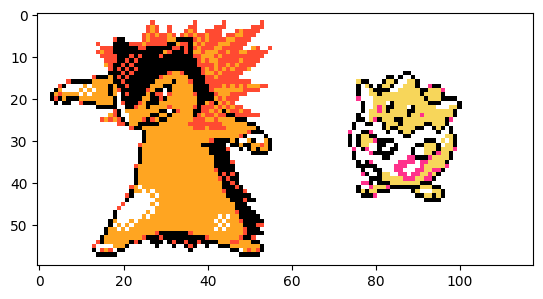

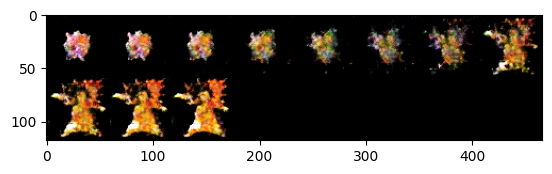

In [11]:
from torchenhanced.util import showTens
from torchvision.utils import make_grid
num=torch.randint(0,len(data),(2,))

pok1 = data[num[0].item()]
pok2 = data[num[1].item()]

showTens(make_grid(torch.stack((pok1,pok2),dim=0)))
lat1 = model.encoder.sample(*model.encoder(pok1[None])) #(1,lat_dim)
lat2 = model.encoder.sample(*model.encoder(pok2[None])) #(1,lat_dim)

t = torch.arange(0,1+1e-6,0.1)[:,None] #(num_t,1)

lat_batch = t*lat1+(1-t)*lat2 # (num_t,lat_dim)
results = model.decoder.forward(lat_batch)

showTens(make_grid(results[:,:3]))


